# Animals dataset on the Shallownet architecture

In this example, we deploy a shallow net architecture for the Animals dataset. The shallow net is composed by one convolution layer. The purpose of this notebook, is to compare the results obtained from the simple image classifiers (classification model and simple artificial neural network) with the results from the shallow net. Beyond the results, here we deploy the class image_to_array from the compvis module. 

## Importing Libraries

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
#compvis module
from compvis.ann.cnns import ShallowNet
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10 # to load the cifar10 dateset
import matplotlib.pyplot as plt
import numpy as np

## Splitting the dataset into training and test set

In [3]:
print("[INFO] loading the CIFAR 10 dataset...")
((X_train, y_train), (X_test, y_test)) = cifar10.load_data()
X_train = X_train.astype("float") / 255. # to normalize between 0 and 1
X_test = X_test.astype("float") / 255.

[INFO] loading the CIFAR 10 dataset...


**Label binarize to transform labels into numbers**

In [4]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

**Making a list with the labels from cifar10**

In [5]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
              "dog", "frog", "horse", "ship", "truck"]

## Creating the model

In [7]:
opt = SGD(learning_rate = 0.01) # Learning rate
model = ShallowNet.build(32, 32, 3, 10) # 32x32 3 channels and 10 classes
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

### Training the model

In [8]:
H = model.fit(X_train, y_train, validation_data = (X_test, y_test),
              batch_size = 32, epochs = 40, verbose = 1)

Epoch 1/40
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8032 - accuracy: 0.3689 - val_loss: 1.6647 - val_accuracy: 0.4078
Epoch 2/40
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5419 - accuracy: 0.4630 - val_loss: 1.4982 - val_accuracy: 0.4618
Epoch 3/40
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4203 - accuracy: 0.5028 - val_loss: 1.4865 - val_accuracy: 0.4815
Epoch 4/40
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3324 - accuracy: 0.5348 - val_loss: 1.3300 - val_accuracy: 0.5279
Epoch 5/40
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2622 - accuracy: 0.5589 - val_loss: 1.3145 - val_accuracy: 0.5298
Epoch 6/40
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2112 - accuracy: 0.5775 - val_loss: 1.2827 - val_accuracy: 0.5501
Epoch 7/40
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1703 - accuracy: 0.5903 - val_loss: 1.2865 - val_ac

### Evaluating the model

Predicting on the test set

In [9]:
predictions = model.predict(X_test, batch_size = 32)

**Confusion matrix**

In [10]:
cr = classification_report(y_test.argmax(axis = 1), predictions.argmax(axis = 1),
                           target_names = labelNames)

In [11]:
print(cr)

              precision    recall  f1-score   support

    airplane       0.63      0.63      0.63      1000
  automobile       0.74      0.71      0.73      1000
        bird       0.42      0.56      0.48      1000
         cat       0.41      0.53      0.46      1000
        deer       0.58      0.48      0.53      1000
         dog       0.65      0.30      0.41      1000
        frog       0.72      0.69      0.70      1000
       horse       0.77      0.59      0.67      1000
        ship       0.70      0.77      0.73      1000
       truck       0.61      0.79      0.69      1000

    accuracy                           0.60     10000
   macro avg       0.62      0.60      0.60     10000
weighted avg       0.62      0.60      0.60     10000



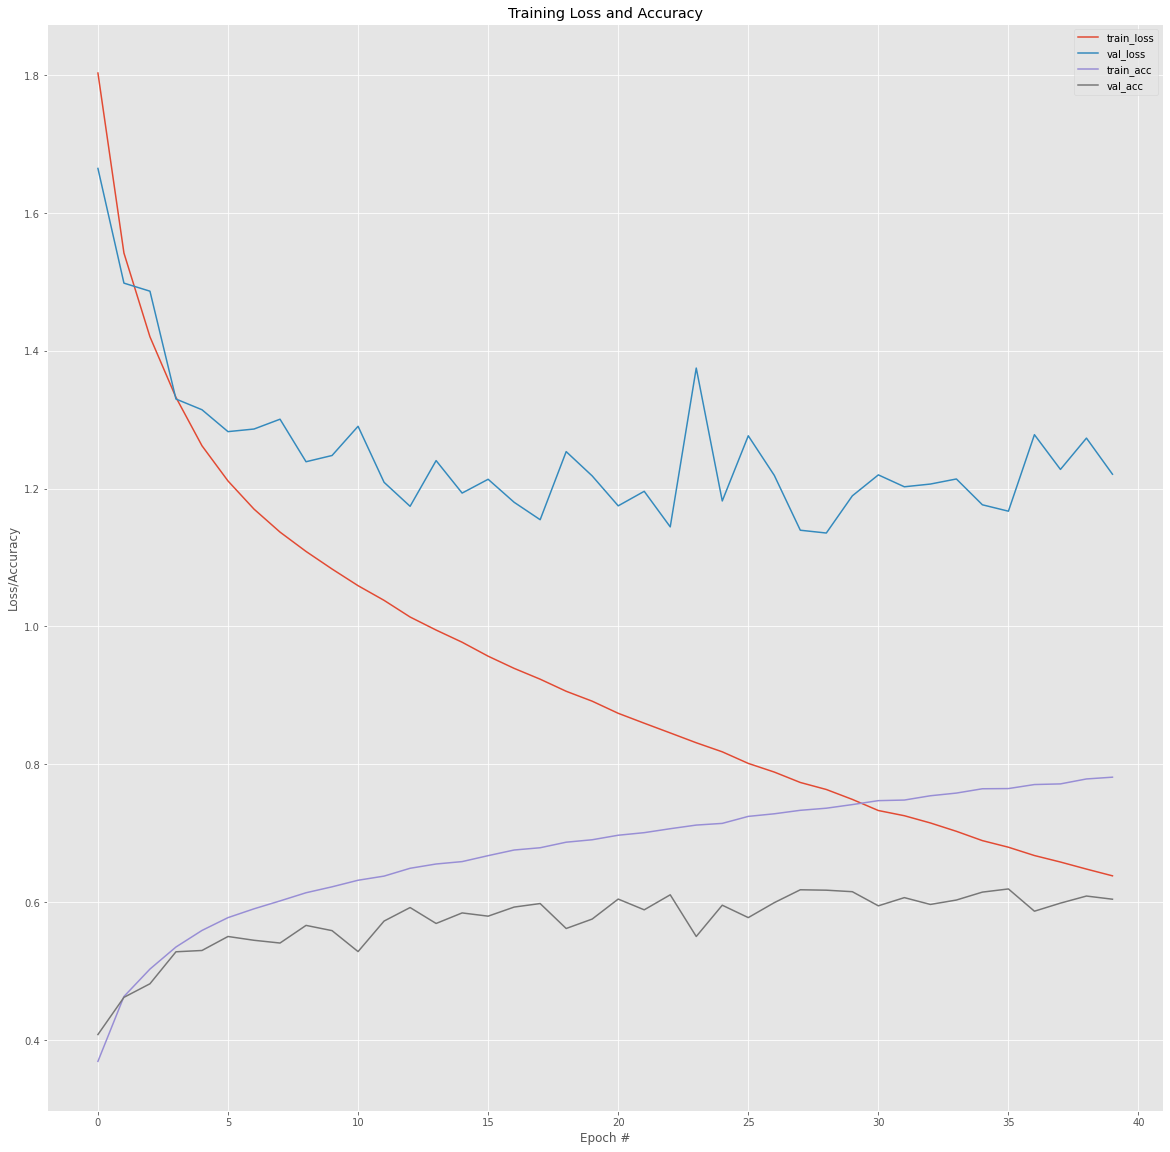

In [12]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20))
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Conclusion